# Задача
Провести анализ данных о продажах, чтобы выявить тенденции и сделать выводы по следующим пунктам:

- Определить, какой регион приносит наибольший доход.
- Найти средний доход в каждом регионе.
- Выяснить, какая категория товаров приносит больше всего дохода.
- Определить, как доходы изменялись со временем.

# Входные данные

Предоставлено файл `sales_data.csv`, содержащий следующие столбцы:

- `Date`: Дата продажи.
- `Category`: Категория товара.
- `Sales`: Сумма продаж в долларах.
- `Region`: Регион, в котором произошла продажа.


In [1]:
!pip install pandas
!pip install matplotlib

In [84]:
from datetime import date
import matplotlib.dates

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sales_data.csv')
df.head()

,Date,Category,Sales,Region
0,2024-01-01,Electronics,1500.0,North
1,2024-01-02,Furniture,800.0,West
2,2024-01-03,Clothing,NaN,South
3,2024-01-04,Electronics,2200.0,West
4,2024-01-05,Furniture,900.0,East


In [61]:
df['Sales'].fillna(0, inplace=True)
df.head()

<ipython-input-61-20074dfb69fb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(0, inplace=True)


,Date,Category,Sales,Region
0,2024-01-01,Electronics,1500.0,North
1,2024-01-02,Furniture,800.0,West
2,2024-01-03,Clothing,0.0,South
3,2024-01-04,Electronics,2200.0,West
4,2024-01-05,Furniture,900.0,East


In [62]:
M = df.groupby('Region').agg({'Sales': 'sum'}).reset_index()
M

,Region,Sales
0,East,4900.0
1,North,7850.0
2,South,1600.0
3,West,3750.0


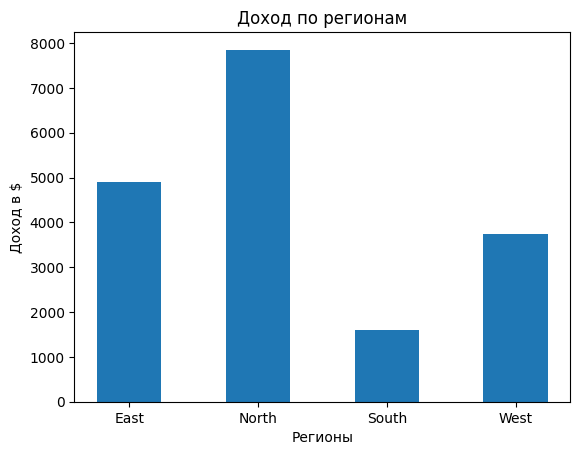

In [63]:
plt.bar(M.Region, M.Sales, 0.5)
plt.title('Доход по регионам')
plt.xlabel('Регионы')
plt.ylabel('Доход в $')
plt.show()

# Вывод

Наибольший доход мы получаем в **северном** регионе, где он составляет **7850$**.

In [64]:
N = df.groupby('Region').agg({'Sales': 'mean'}).reset_index()
N

,Region,Sales
0,East,980.000000
1,North,1308.333333
2,South,400.000000
3,West,750.000000


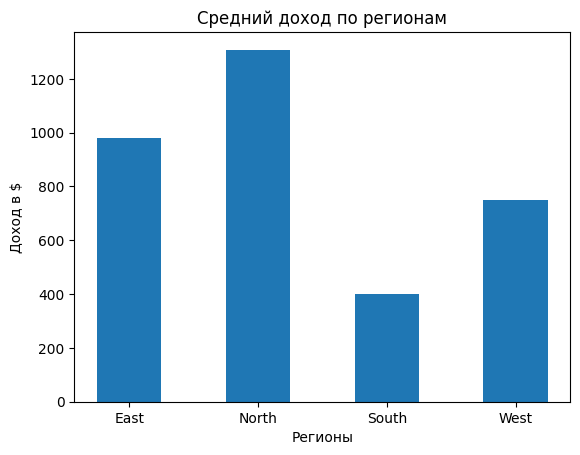

In [47]:
plt.bar(N.Region, N.Sales, 0.5)
plt.title('Средний доход по регионам')
plt.xlabel('Регионы')
plt.ylabel('Доход в $')
plt.show()

# Вывод

Средний доход по регионам:

1) Северный регион - 1308$

2) Восточный регион - 980$

3) Западный регион - 750$

4) Южный регион - 450$

In [65]:
C = df.groupby('Category').agg({'Sales': 'sum'}).reset_index()
C

,Category,Sales
0,Clothing,2400.0
1,Electronics,10500.0
2,Furniture,5200.0


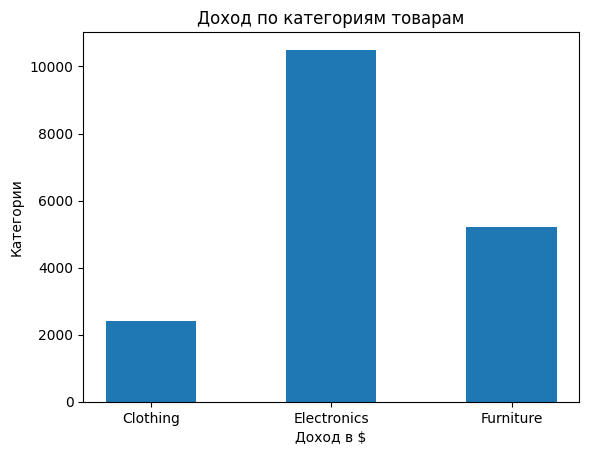

In [66]:
plt.bar(C.Category, C.Sales, 0.5)
plt.title('Доход по категориям товарам')
plt.xlabel('Доход в $')
plt.ylabel('Категории')
plt.show()

### Вывод

Наиболее прибыльной категорией товаров является **электроника**, доход от которой составляет **10500$**.

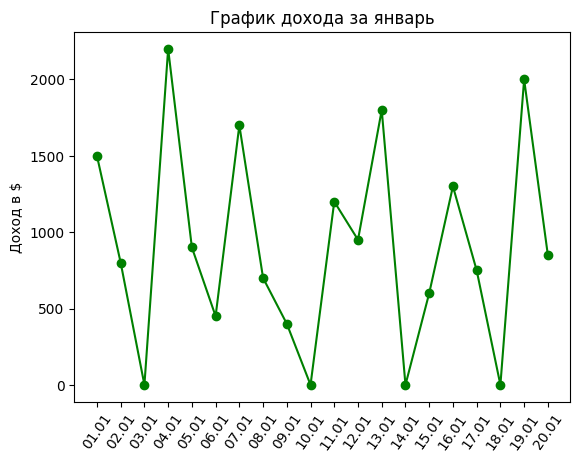

In [87]:
sales_by_date = df.groupby('Date')['Sales'].sum()
plt.plot(sales_by_date.index, sales_by_date.values, color='green', marker='o', linestyle='solid')
axes = plt.subplot(1, 1, 1)
axes.tick_params(axis='x', labelrotation=55)
axes.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m"))
plt.title('График дохода за январь')
plt.ylabel('Доход в $')
plt.show()